# Truncation Effects

This is a notebook to examine the effects of truncating the Hilbert space on the fidelity of the pulse. Specifically, how many levels need to be simulated to achieve a given fidelity?

In [3]:
from qutip import *
from transmon_code.simulate import simulate
from transmon_code.transmon import Transmon
from transmon_code.helpers import expand, calculate_target_state

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# calculate the fidelities
# we simulate a transmon with no decay, dephasing, or noise, but using the full Hamiltonian

args = {'A': 7.348405182474674, 'Γ': 0.5002663076440171, 'A_DRAG': 0.007838355884812595}
fidelities = []

level_range = range(6,15)

for n_levels in level_range:

    tr = Transmon(n_levels=n_levels, initial_state=0, Ω=5000, α=-100, RWA=False, dt=1/10000)
    args.update({"ω":tr.Ω})
    target = expand(calculate_target_state("X90", tr.ψ0), n_levels)
    _, f = simulate(tr, args, target=target)
    fidelities.append(f)

[0.9990308102264378, 0.9994529748556595, 0.9993554145265051, 0.9994167571090359, 0.9994147701696623, 0.9994126414086704, 0.9994077732249838, 0.999399381335175, 0.9993982830034999]


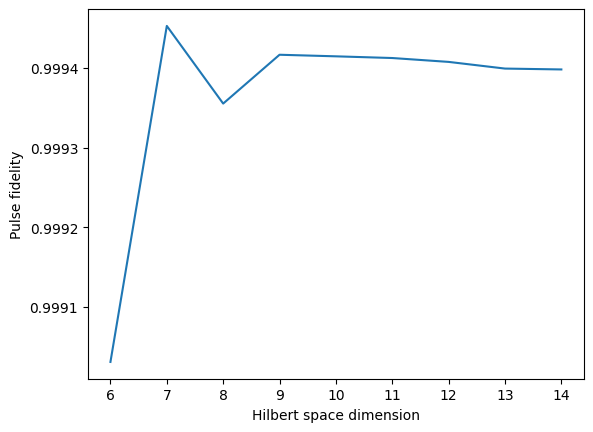

In [13]:
print(fidelities)
plt.plot(level_range, np.array(fidelities))
plt.xlabel("Hilbert space dimension")
plt.ylabel("Pulse fidelity")
plt.show()

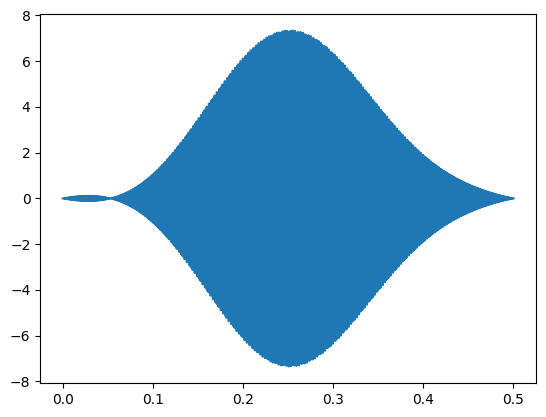

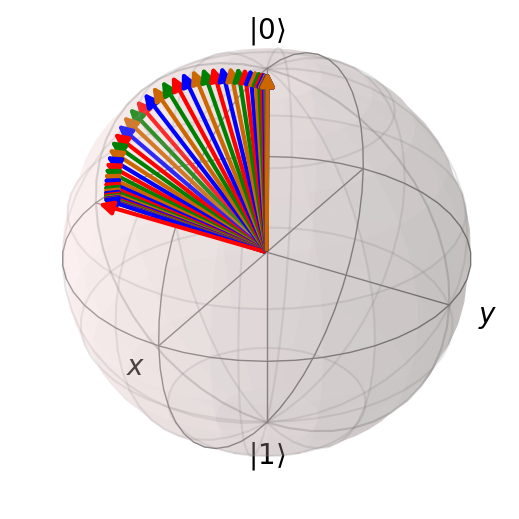

0.9994529748556595


In [15]:
n_levels = 7

tr = Transmon(n_levels=n_levels, initial_state=0, Ω=5000, α=-100, RWA=False, dt=1/10000)
args = {'A': 7.348405182474674, "ω":tr.Ω, 'Γ': 0.5002663076440171, 'A_DRAG': 0.007838355884812595}

target = expand(calculate_target_state("X90", tr.ψ0), n_levels)
_, f = simulate(tr, args, target=target, plot=True)

print(f)